# I am using the Heart Disease data set from the UCI repository to predict whether people develop heart disease. 

### In lieu of using the available processed data with 14 attributes in CSV format, I am starting with the complete dataset of 76 attributes. 

   #### Task1: Put data in dataframe and remove irrelevant columns. 
   #### Task2: Feature Selection/Addressing missing values
   #### Task3: Explore data - see which fetaures are relevant. 
   #### Task4: Check for imbalanced class set. If present, deal with this. 
   #### Task5: Exploring models 
   #### Task6: Hyperparameter optimization - fine tuning the selected model.
   #### Task7: Test the selected model

### Task 1) Getting data together

In [1]:
import io
import requests
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'

df = pd.read_csv(url)
df.head(10) #This is not in the right format!

,1254 0 40 1 1 0 0
0,-9 2 140 0 289 -9 -9 -9
1,0 -9 -9 0 12 16 84 0
2,0 0 0 0 150 18 -9 7
3,172 86 200 110 140 86 0 0
4,0 -9 26 20 -9 -9 -9 -9
5,-9 -9 -9 -9 -9 -9 -9 12
6,20 84 0 -9 -9 -9 -9 -9
7,-9 -9 -9 -9 -9 1 1 1
8,1 1 -9. -9. name
9,1255 0 49 0 1 0 0


In [184]:
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data = r.text.replace('\n', ' ').replace(' name ', ' name\n')

hungary = pd.read_table(io.StringIO(data), sep='\s+', header=None)
print(hungary)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    3001   0  65   1   1   1   1  -9   4  115  ...    1   1   1   1   1   1   
1    3002   0  32   1   0   0   0  -9   1   95  ...    1   1   1   1   1   5   
2    3003   0  61   1   1   1   1  -9   4  105  ...    2   1   1   1   1   1   
3    3004   0  50   1   1   1   1  -9   4  145  ...    1   1   1   1   1   5   
4    3005   0  57   1   1   1   1  -9   4  110  ...    2   1   1   1   1   1   
5    3006   0  51   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
6    3007   0  47   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
7    3008   0  60   1   1   1   1  -9   4  160  ...    1   2  -9  -9  -9  -9   
8    3009   0  55   1   0   0   0  -9   2  140  ...    1   1   1   1   1   1   
9    3010   0  53   1   1   1   1  -9   4  125  ...    1   1   1   1   1   1   
10   3011   0  62   0   1   1   1  -9   4  120  ...    1   1   1   1   1   1   
11   3012   0  51   1   1   1   1  -9   

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data1 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

lb = pd.read_table(io.StringIO(data1), sep='\s+', header=None)

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data2 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

switz = pd.read_table(io.StringIO(data2), sep='\s+', header=None)

In [5]:
frames = [hungary, lb, switz] #Now I want to merge all 3 dataframes and then I will label the columns
df = pd.concat(frames)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.0,-9.0,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.0,-9.0,name


## Task 2) Feature Selection / Dimensionality Reduction

In [6]:
col_list = [2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57] 
#Selecting features - for now i'm elminating blank columns (there are a lot of blank columns here)
            
hungary=hungary[col_list]
lb = lb[col_list]
switz=switz[col_list]

frames = [hungary, lb, switz]
df = pd.concat(frames)

In [7]:
df.columns=['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal','outcome']
#These are the new column labels

In [269]:
df.head(5) #yay - worked so far!

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


## Task 2 cont) Looking for Null values or missing values

In [270]:
df.info() #So far everything is not null, but I'll come back to this as some of the negative numbers above are concerning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 20 columns):
age          617 non-null int64
sex          617 non-null int64
cp_type      617 non-null int64
rest_bp      617 non-null int64
chol         617 non-null int64
yrs_smoke    617 non-null int64
fbs          617 non-null int64
hist_dm      617 non-null int64
hist_cad     617 non-null int64
rest_ecg     617 non-null int64
max_hr       617 non-null int64
rest_hr      617 non-null int64
ex_bp1       617 non-null int64
ex_bp2       617 non-null int64
exang        617 non-null int64
oldpeak      617 non-null float64
slope        617 non-null int64
ca           617 non-null int64
thal         617 non-null int64
outcome      617 non-null int64
dtypes: float64(1), int64(19)
memory usage: 101.2 KB


In [271]:
max_hr_null = df[df.max_hr.isnull()]
print max_hr_null #Nothing is null but maybe some are 0? 

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [272]:
max_hr_0 = df[df.max_hr == 0]
print max_hr_0 #Nothing is 0 so maybe some are negative?

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [59]:
max_hr_neg = df[df.max_hr <= 0] 
print max_hr_neg #Nothing is 0 so maybe some are negative? #Yup, there are a lot of negative values which don't make
#sense in this context as you can't have a negative heart rate or bp. I will explore/address this later on.

     age  sex  cp_type  rest_bp  chol  yrs_smoke  fbs  hist_dm  hist_cad  \
289   48    0        2       -9   308         -9    0       -9        -9   
13    63    1        3       -9     0          3    0       -9         1   
23    74    1        3       -9     0         40    0       -9         0   
26    51    1        4       -9     0         30    1        1         1   
29    55    1        3       -9   228         30    0       -9         0   
30    54    1        4       -9     0         40    0       -9         1   
36    60    1        4       -9   281         47    0       -9         0   
38    58    1        4       -9   203         40    1       -9         1   
44    57    1        4       -9   277         25    1       -9         1   
51    63    0        2       -9     0         54    0       -9         1   
57    60    1        3       -9   316         40    1       -9         0   
58    62    1        2       -9     0         15    0       -9         0   
60    51    

## Task 3: Exploring the data

#### Are age and sex related to heart disease?

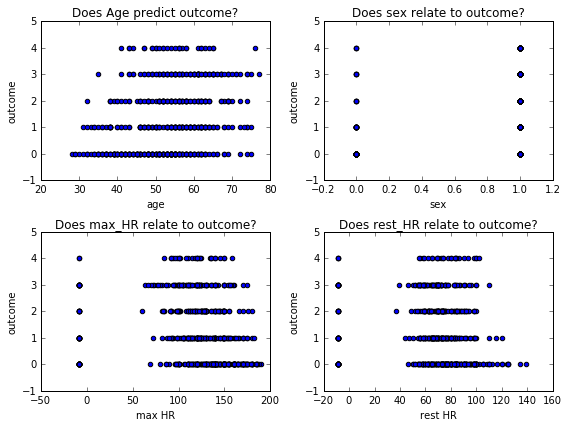

In [60]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
ax1.scatter(df.age,df.outcome)
plt.xlabel('age')
plt.ylabel('outcome')
plt.title('Does Age predict outcome?')

ax2 = fig.add_subplot(222)
ax2.scatter(df.sex,df.outcome)
plt.xlabel('sex')
plt.ylabel('outcome')
plt.title('Does sex relate to outcome?')

ax3 = fig.add_subplot(223)
ax3.scatter(df.max_hr,df.outcome)
plt.xlabel('max HR')
plt.ylabel('outcome')
plt.title('Does max_HR relate to outcome?')

ax4 = fig.add_subplot(224)
ax4.scatter(df.rest_hr,df.outcome)
plt.xlabel('rest HR')
plt.ylabel('outcome')
plt.title('Does rest_HR relate to outcome?')
fig.tight_layout()

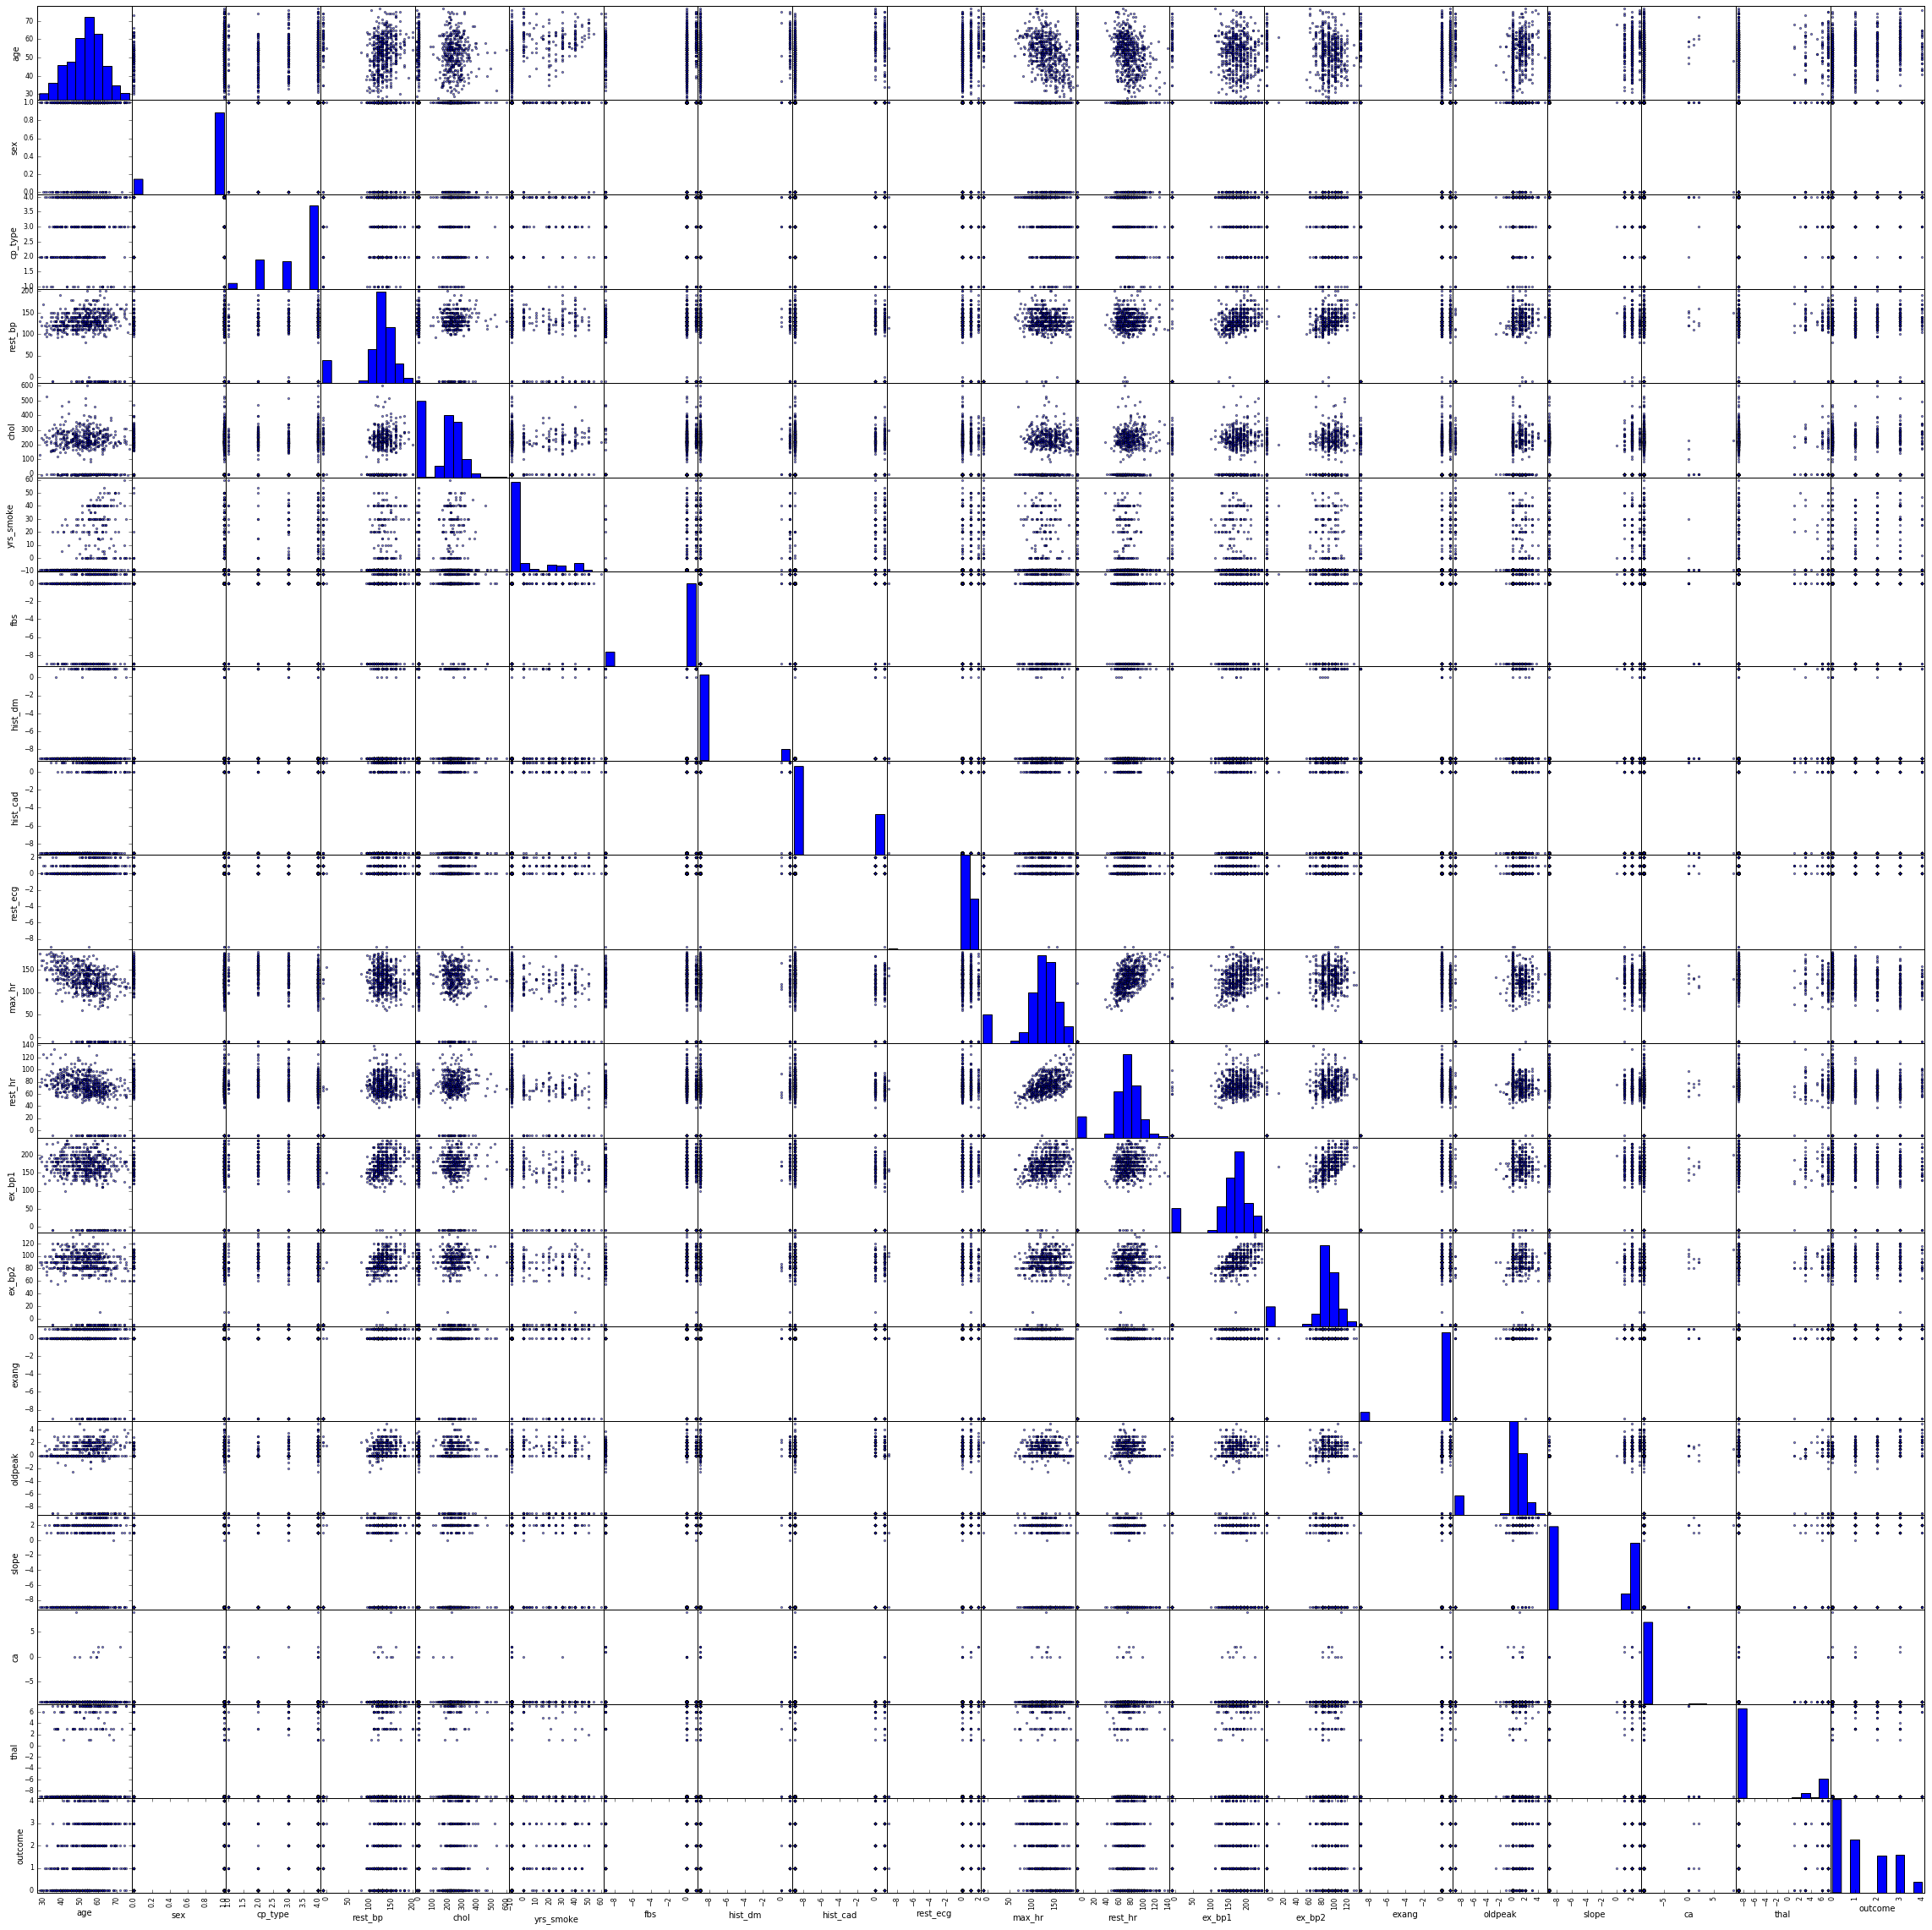

In [61]:
#Plotting one-by-one seems tedious. Lets try something different -
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(df, figsize=(40, 40))

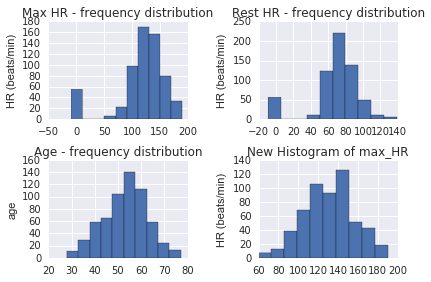

In [196]:
#Now I'm trying to get a feel for the negative values and what the data looks like if I exclude the negative values

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(221)
plt.hist(df.max_hr) # Need to find and drop these 0s 
plt.title('Max HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax2 = fig.add_subplot(222)
plt.hist(df.rest_hr) # Need to find and drop these 0s 
plt.title('Rest HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax3 = fig.add_subplot(223)
plt.hist(df.age) #Since I imported SNS above, everything now defaults to seaborn style? how do i fix this?
plt.title('Age - frequency distribution')
plt.ylabel('age')

ax4 = fig.add_subplot(224)
max_hr_pos = df[df.max_hr >= 0] #We don't want to eliminate the whole rows for the negative values, we just want to replace with Nan
plt.hist(max_hr_pos.max_hr)
plt.title('New Histogram of max_HR')
plt.ylabel('HR (beats/min)')

fig.tight_layout()

# Something funny is going on with the HRs - why are there negative numbers? Going to explore this


In [63]:
rest_hr_pos = df[df.rest_hr >= 0] #Again just filtering out the negative ones for graphing purposes

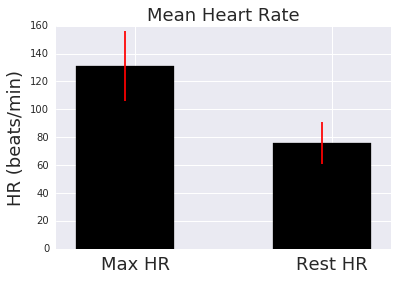

In [195]:
#Now I want to graph the mean MaxHR and RestHR on a bar graph. Im wondering if patients in this cohort have very similar
# rest and max HRs (I hypothesize that there rest heart rates are high and then when they exercise they achieve their max
# heart rate very quickly)
fig = plt.figure(figsize=(6,4)) #Plotting group mean results
ax = fig.add_subplot(111)
width = .5
means = [max_hr_pos['max_hr'].mean(), rest_hr_pos['rest_hr'].mean()]
std = [max_hr_pos['max_hr'].std(), rest_hr_pos['rest_hr'].std()]
ind = np.arange(len(means))
bar_p = plt.bar(ind, means, width, yerr = std, color = 'black', ecolor='red')

ax.set_title('Mean Heart Rate', fontsize=18)
xTickMarks = ['Max HR', 'Rest HR']
ax.set_xticks(ind+.3)
ax.set_xlim(-.1)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=18)
ax.set_ylabel('HR (beats/min)', fontsize=18)
fig.savefig('Max_Rest_HR.png')

/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


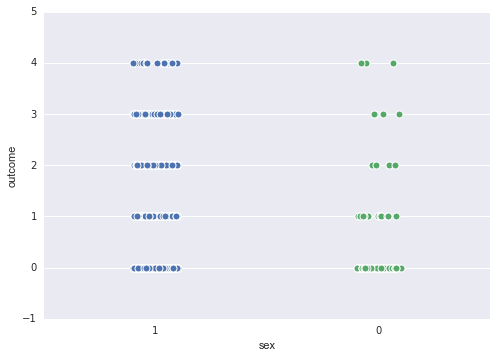

In [69]:
#trying a stripplot for sex - So this shows me that there are more males than females in the higher levels of heart disease 
import seaborn as sns
sns.stripplot(df.sex,df.outcome,jitter=True)

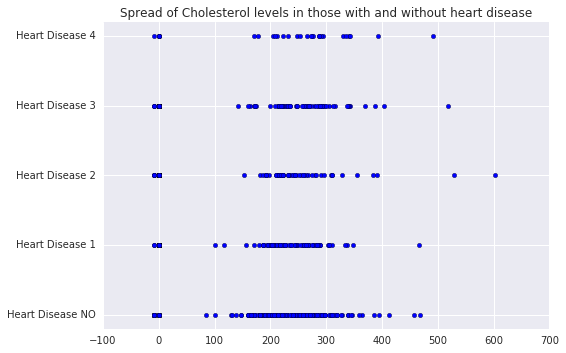

In [70]:
#I'm going to divide the data by outcome group 
#I'm just going to explore if there are obvious differences in these features between the groups. 
chd_pos = df[df.outcome >= 1] 
chd_neg = df[df.outcome == 0]
#Going to look at cholesterol and max HR first
fig = plt.figure()
ax = fig.add_subplot(111)
n=4
ind1=np.arange(pd.value_counts(chd_neg['outcome']))
y = chd_pos['chol'] #, chd_neg['chol']]
x = chd_pos.outcome
ax.scatter(y, x)
ax.scatter(chd_neg['chol'], chd_neg['outcome'], cmap='gray')
ax.set_ylim(-.2,4.2)
ax.set_title('Spread of Cholesterol levels in those with and without heart disease')
yTickMarks = ['', 'Heart Disease NO', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4']
ax.set_yticklabels(yTickMarks)
plt.show()

In [71]:
#Now I'm exploring some of those columns that seemed to have all negative #s 
#like yrs_smoke, hist_dm, hist_cad, slope, ca, and thal
#I'm going to explore some of this columns with -9s to see if they take up the entire column. 

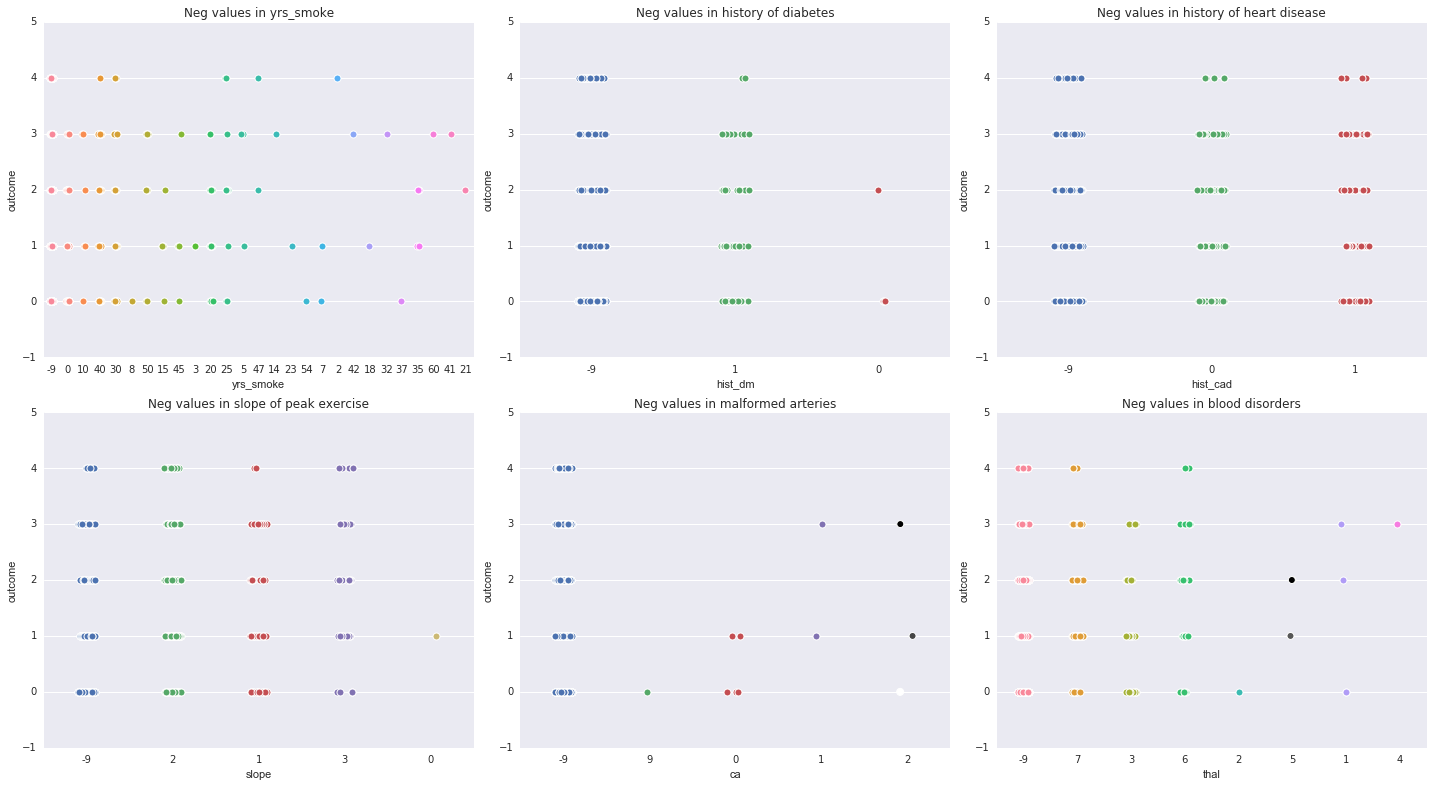

In [72]:
#Exploring columns with neg #s
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
a1 = sns.stripplot(df.yrs_smoke,df.outcome, jitter=True)
plt.xlabel('yrs_smoke')
plt.ylabel('outcome')
plt.title('Neg values in yrs_smoke') #Why isnt x_axis in ascending order?

ax2 = fig.add_subplot(332)
a2 = sns.stripplot(df.hist_dm,df.outcome, jitter=True)
plt.xlabel('hist_dm')
plt.ylabel('outcome')
plt.title('Neg values in history of diabetes')

ax3 = fig.add_subplot(333)
a3 = sns.stripplot(df.hist_cad,df.outcome, jitter=True)
plt.xlabel('hist_cad')
plt.ylabel('outcome')
plt.title('Neg values in history of heart disease')

ax4 = fig.add_subplot(334)
a4 = sns.stripplot(df.slope,df.outcome, jitter=True)
plt.xlabel('slope')
plt.ylabel('outcome')
plt.title('Neg values in slope of peak exercise')
fig.tight_layout()

ax5 = fig.add_subplot(335)
a5 = sns.stripplot(df.ca,df.outcome, jitter=True)
plt.xlabel('ca')
plt.ylabel('outcome')
plt.title('Neg values in malformed arteries')
fig.tight_layout()

ax6 = fig.add_subplot(336)
a6 = sns.stripplot(df.thal,df.outcome, jitter=True)
plt.xlabel('thal')
plt.ylabel('outcome')
plt.title('Neg values in blood disorders')
fig.tight_layout()

## Task 2 - revisited) Looking for Null values or missing values 
### Now i've determined there are no null values but there are a lot of "-9"s in lieu of null values. 

In [273]:
#I'm going to try a few different ways of feature/selection missing values to see what impact it has on the data

## option 1 - regular data, -9s and 0s present, all data included 
## option 2 - thresholded 50%; discrete variables: keep as label coded, impute contunous variables
## option 3 - thresholded 50; discrete variables: change to ohe coded, impute contunous variables
## option 4 - normalized data - some classifiers like regression and svm require normalized data

#### Option 1:  Regular data - 0s and -9s included instead of NaNs

In [8]:
features = df.iloc[:, :-1]
target = df.outcome

##### Option 2: - thresholded 50%; discrete variables: changed to ohe coding, impute contunous variables

In [9]:
collist1=['age','rest_bp','chol','yrs_smoke','max_hr','rest_hr','ex_bp1','ex_bp2'] #list of not categorical features where -9s and 0s need to be turned into NaNs
collist2 = ['sex','cp_type','fbs','hist_dm','hist_cad','rest_ecg','exang','slope','ca','thal','oldpeak']
#list of not categorical and not catergorical features where -9s only need to be turned into NaNs

In [10]:
df_notcat = df[collist1]
df_notcat = df_notcat[df_notcat > 0] #Replacing the -9s and 0s with NaNs

In [11]:
df_cat = df[collist2]
df_cat = df_cat[df_cat > -9] #Replacing the -9s with NaNs

In [12]:
frames = [df_notcat, df_cat]

In [13]:
df_hasnull = pd.concat(frames, axis=1)
df_hasnull.head()

,age,rest_bp,chol,yrs_smoke,max_hr,rest_hr,ex_bp1,ex_bp2,sex,cp_type,fbs,hist_dm,hist_cad,rest_ecg,exang,slope,ca,thal,oldpeak
0,40,140.0,289.0,NaN,172.0,86.0,200.0,110.0,1,2,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,49,160.0,180.0,NaN,156.0,100.0,220.0,106.0,0,3,0.0,NaN,NaN,0.0,0.0,2.0,NaN,NaN,1.0
2,37,130.0,283.0,NaN,98.0,58.0,180.0,100.0,1,2,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.0
3,48,138.0,214.0,NaN,108.0,54.0,210.0,106.0,0,4,0.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.5
4,54,150.0,NaN,NaN,122.0,74.0,130.0,100.0,1,3,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [14]:
print df_hasnull.isnull().sum()
print (len(df_hasnull)) 

age            0
rest_bp       60
chol         202
yrs_smoke    465
max_hr        55
rest_hr       56
ex_bp1        63
ex_bp2        63
sex            0
cp_type        0
fbs           90
hist_dm      545
hist_cad     422
rest_ecg       2
exang         55
slope        308
ca           606
thal         475
oldpeak       62
dtype: int64
617


In [15]:
df_hasnull = df_hasnull.dropna(axis=1,thresh=308)
df_hasnull.info() #Excluding columns with greater than 50% missing values. 
#Even if we impute these values, it won't buy us much.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 14 columns):
age         617 non-null int64
rest_bp     557 non-null float64
chol        415 non-null float64
max_hr      562 non-null float64
rest_hr     561 non-null float64
ex_bp1      554 non-null float64
ex_bp2      554 non-null float64
sex         617 non-null int64
cp_type     617 non-null int64
fbs         527 non-null float64
rest_ecg    615 non-null float64
exang       562 non-null float64
slope       309 non-null float64
oldpeak     555 non-null float64
dtypes: float64(11), int64(3)
memory usage: 72.3 KB


In [16]:
cont_col_missing = ['rest_bp','chol','max_hr','rest_hr','ex_bp1','ex_bp2','oldpeak']

In [17]:
#I will now go through the columns of missing values and see if there is any relation between the column with missing values
# and any other columns 
def plot_features(x, title):
    plt.figure(figsize=(10,14));
    i = 0
    for col in cont_col_missing:
        i += 1
        plt.subplot(7,2,i)
        plt.scatter(df_hasnull[col], df_hasnull[x])
        plt.title(title % (col, x))
        plt.tight_layout()

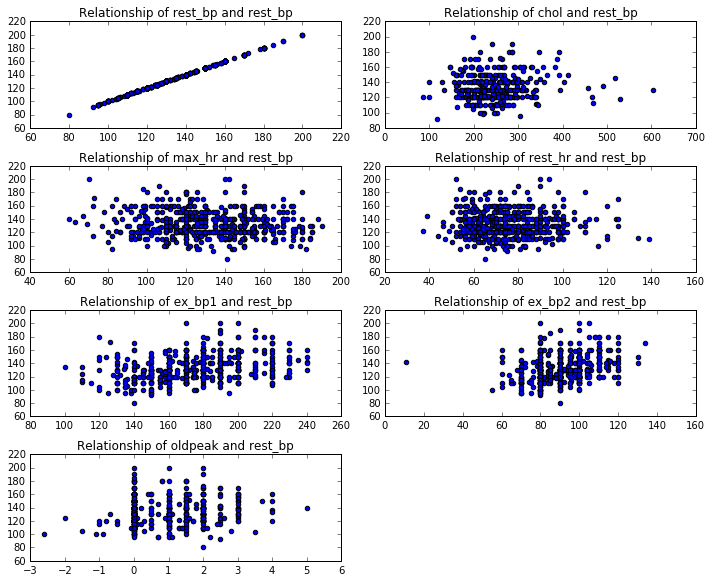

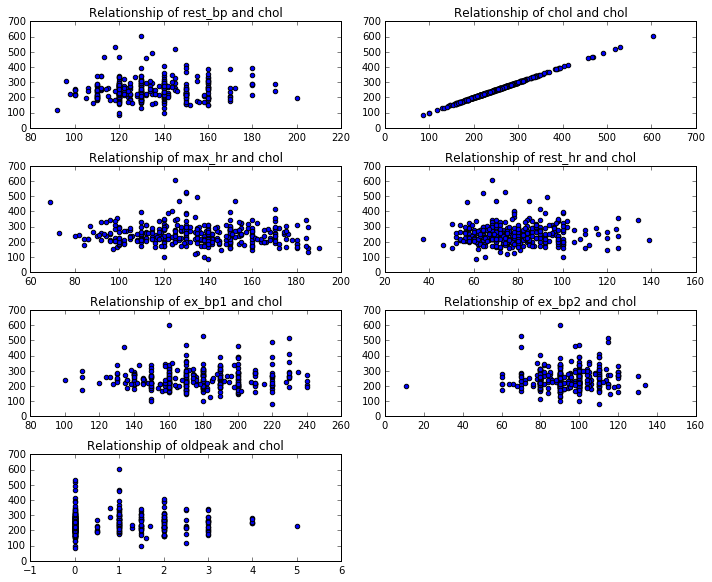

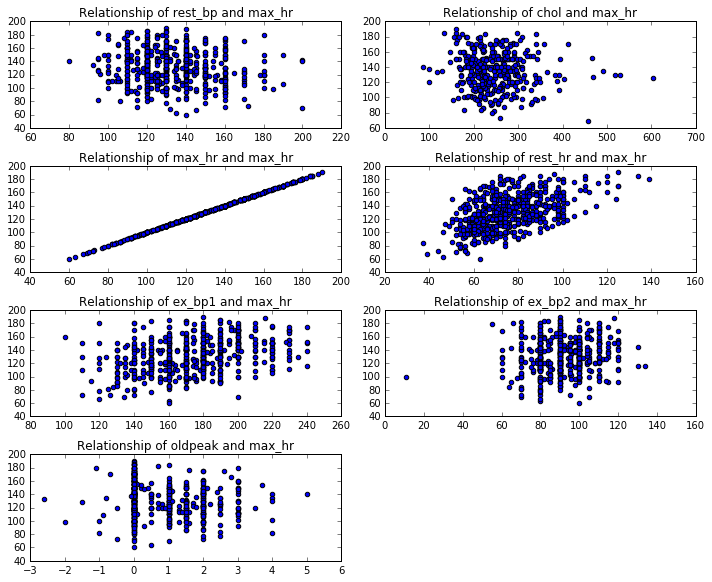

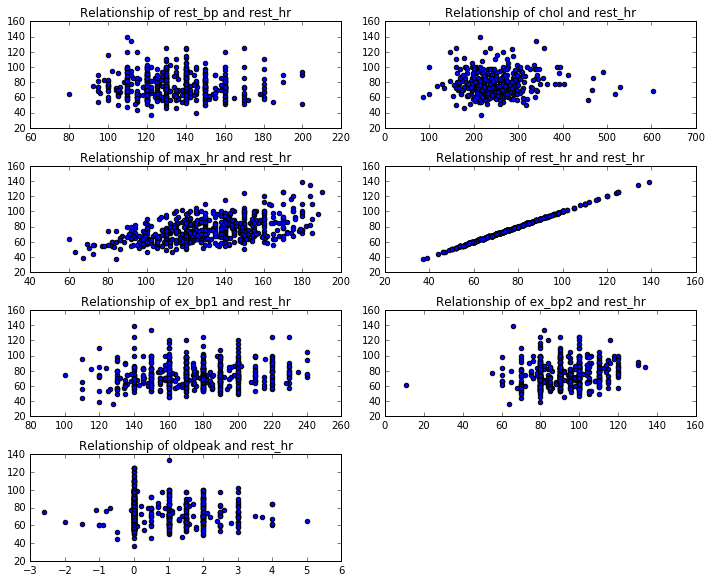

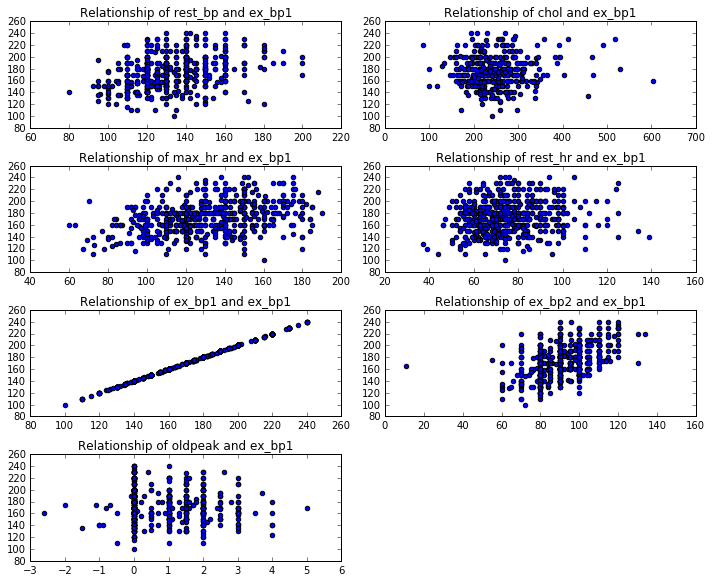

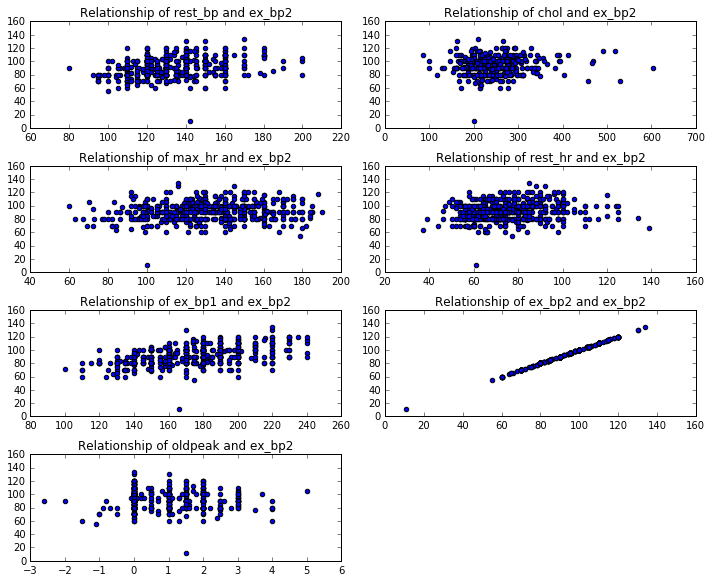

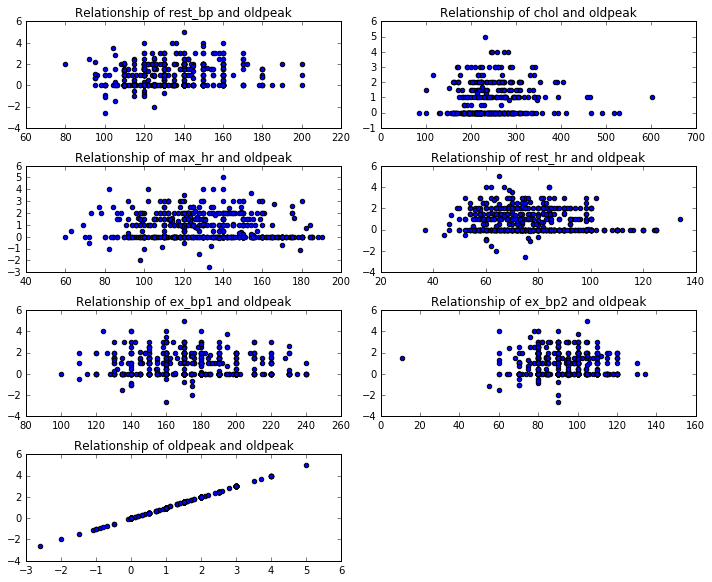

In [18]:
for x in cont_col_missing:
    plot_features(x, 'Relationship of %s and %s')
#columns with missing valuesplot_features('rest_bp', 'Relationship of %s and rest bp')

In [19]:
#Looking for possible linear relationships from graphs above
from pandas.stats.api import ols
res = ols(y=df_hasnull.ex_bp2, x=df_hasnull.ex_bp1)
res

/Users/sheena/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1254
Number of Degrees of Freedom:   2

R-squared:         0.0265
Adj R-squared:     0.0257

Rmse:             13.4237

F-stat (1, 1252):    34.0648, p-value:     0.0000

Degrees of Freedom: model 1, resid 1252

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0833     0.0143       5.84     0.0000     0.0553     0.1113
     intercept    76.2972     2.4840      30.72     0.0000    71.4286    81.1658
---------------------------------End of Summary---------------------------------

In [176]:
t = df_hasnull.ex_bp2
p = df_hasnull.ex_bp1

In [177]:
Correlation = Covariance(t,p) / SQRT( Var(t)* Var(p))

NameError: name 'Covariance' is not defined

In [20]:
cat_feat = ['sex','cp_type','fbs', 'rest_ecg', 'exang', 'slope']

In [21]:
for col in df_hasnull:
    if col not in cat_feat:
        df_hasnull.loc[:,col].fillna(df_hasnull[col].mean(), inplace=True)

In [22]:
df_hasnull_ohe = df_hasnull.copy()

In [23]:
df_ohe = df_hasnull_ohe.fillna(0)
df_ohe = pd.get_dummies(df_ohe, columns=cat_feat, dummy_na=True)
df_ohe.head()

,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak,sex_0.0,sex_1.0,...,rest_ecg_2.0,rest_ecg_nan,exang_0.0,exang_1.0,exang_nan,slope_0.0,slope_1.0,slope_2.0,slope_3.0,slope_nan
0,40,140.0,289.00000,172.0,86.0,200.0,110.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,160.0,180.00000,156.0,100.0,220.0,106.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,130.0,283.00000,98.0,58.0,180.0,100.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,48,138.0,214.00000,108.0,54.0,210.0,106.0,1.5,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54,150.0,246.93494,122.0,74.0,130.0,100.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
features_ohe = df_ohe

##### Option 3: thresholded 50; discrete variables: label coding, impute contunous variables

In [25]:
#Typically, random forest methods and other methods encourage two ways of handling missing values if we don't know
#anything about the data: The first step is to look for relationships with the data - can one variable predict another? 
#a) drop data points with missing values (not recommended); 
#b) fill in missing values with the median (for numerical values) or mode (for categorical values). 

In [26]:
df_hasnull_label = df_hasnull.copy() #Already thresholded and continous variables have been imputed

In [27]:
cat_col_missing = ['fbs','rest_ecg','exang','slope'] #list of the categorical features with missing values 

In [28]:
for col in cat_col_missing:
        df_hasnull_label.loc[:,col].fillna(df_hasnull_label[col].mode().iloc[0], inplace=True)

In [29]:
features_label = df_hasnull_label

##### Option 4: normalized data - some classifiers like regression and svm require normalized data

In [204]:
collist1=['age','rest_bp','chol','max_hr','rest_hr',
                'ex_bp1','ex_bp2','oldpeak']
df_norm1 = df_hasnull_label[collist1]

In [31]:
collist2 = ['sex','cp_type','fbs','rest_ecg','exang','slope']
df_categorical = df_hasnull_label[collist2]

In [215]:
df_norm2 = (df_norm1 - df_norm1.mean()) / (df_norm1.std())
df_norm2.head()

,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak
0,-1.362338,0.408645,8.136630e-01,1.706393,0.713289,1.052745,1.438861,-0.800631
1,-0.423162,1.514646,-1.294720e+00,1.039789,1.680349,1.846242,1.125309,0.211556
2,-1.675397,-0.144356,6.976052e-01,-1.376649,-1.220829,0.259247,0.654980,-0.800631
3,-0.527515,0.298045,-6.370594e-01,-0.960022,-1.497132,1.449494,1.125309,0.717650
4,0.098602,0.961645,1.044544e-14,-0.376744,-0.115619,-1.724496,0.654980,-0.800631


In [33]:
df_categorical.head()

,sex,cp_type,fbs,rest_ecg,exang,slope
0,1,2,0.0,0.0,0.0,2.0
1,0,3,0.0,0.0,0.0,2.0
2,1,2,0.0,1.0,0.0,2.0
3,0,4,0.0,0.0,1.0,2.0
4,1,3,0.0,0.0,0.0,2.0


In [34]:
normdata = [df_categorical, df_norm2]

In [36]:
df_norm = pd.concat(normdata, axis=1)
df_norm

,sex,cp_type,fbs,rest_ecg,exang,slope,age,rest_bp,chol,max_hr,rest_hr,ex_bp1,ex_bp2,oldpeak
0,1,2,0.0,0.0,0.0,2.0,-0.266431,6.157989e-02,8.120668e-02,0.315056,0.101237,1.895307e-01,1.492325e-01,-1.040778e-01
1,0,3,0.0,0.0,0.0,2.0,-0.082757,2.282466e-01,-1.292180e-01,0.191979,0.238492,3.323878e-01,1.167122e-01,2.750119e-02
2,1,2,0.0,1.0,0.0,2.0,-0.327655,-2.175344e-02,6.962367e-02,-0.254175,-0.173273,4.667354e-02,6.793167e-02,-1.040778e-01
3,0,4,0.0,0.0,1.0,2.0,-0.103165,4.491323e-02,-6.358096e-02,-0.177252,-0.212488,2.609593e-01,1.167122e-01,9.329066e-02
4,1,3,0.0,0.0,0.0,2.0,0.019284,1.449132e-01,1.042495e-15,-0.069559,-0.016410,-3.104693e-01,6.793167e-02,-1.040778e-01
5,1,3,0.0,0.0,0.0,2.0,-0.286839,-1.050868e-01,1.777318e-01,0.299672,0.101237,1.752450e-01,6.793167e-02,-1.040778e-01
6,0,2,0.0,0.0,0.0,2.0,-0.164390,-2.175344e-02,-1.917942e-02,0.299672,0.140453,1.895307e-01,1.167122e-01,-1.040778e-01
7,1,2,0.0,0.0,0.0,2.0,0.019284,-1.884201e-01,-7.516398e-02,0.084287,-0.192880,3.323878e-01,-1.759708e-01,-1.040778e-01
8,1,4,0.0,0.0,1.0,2.0,-0.327655,6.157989e-02,-7.709448e-02,-0.008021,-0.124253,1.181021e-01,6.793167e-02,9.329066e-02
9,0,2,0.0,0.0,0.0,2.0,-0.103165,-1.050868e-01,7.155417e-02,-0.084944,-0.036018,-2.390407e-01,-9.466995e-02,-1.040778e-01


In [37]:
features_norm = df_norm

## Task4: Check for imbalanced class set.

In [38]:
df.groupby('outcome').size() #Classes are imbalanced, need to deal with this 

outcome
0    247
1    141
2     99
3    100
4     30
dtype: int64

In [39]:
df.outcome.value_counts(normalize=True)

0    0.400324
1    0.228525
3    0.162075
2    0.160454
4    0.048622
Name: outcome, dtype: float64

## Task5: Exploring models 

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )

In [101]:
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 1 above - all data left in, no imputation

In [191]:
def classifier_metrics(clf, title):
    clf = model()
    clf.fit(X_train, y_train)
    print title
    print '%30s: %s' % ('Default score (accuracy)', clf.score(X_train, y_train))
    predicted_labels = clf.predict(X_train)
    print '%30s: %s' % ('Cross val score', cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_weighted').mean())
    print '%30s: %s' % ('Precision', precision_score(y_train, predicted_labels, average=None))
    print '%30s: %s' % ('Recall', recall_score(y_train, predicted_labels, average=None))

In [192]:
for model in [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier]:
    title = 'Data includes missing values - no imputation' 
    print 'Metrics for %s' % model.__name__
    print '=' * 50
    classifier_metrics(model, title)
    print '\n'

Metrics for LogisticRegression
Data includes missing values - no imputation
      Default score (accuracy): 0.559837728195
               Cross val score: 0.448958766749
                     Precision: [ 0.6770428   0.42962963  0.38709677  0.44230769  0.5       ]
                        Recall: [ 0.85294118  0.50877193  0.15384615  0.32394366  0.34615385]


Metrics for DecisionTreeClassifier
Data includes missing values - no imputation
      Default score (accuracy): 1.0
               Cross val score: 0.464356085474
                     Precision: [ 1.  1.  1.  1.  1.]
                        Recall: [ 1.  1.  1.  1.  1.]


Metrics for RandomForestClassifier
Data includes missing values - no imputation
      Default score (accuracy): 0.991886409736
               Cross val score: 0.422279766741
                     Precision: [ 0.99509804  0.9826087   0.98734177  1.          1.        ]
                        Recall: [ 0.99509804  0.99122807  1.          0.98591549  0.96153846]


Met

In [35]:
model = DecisionTreeClassifier()

In [47]:
scorelist = []
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    scorelist.append(model.score(X_train,y_train))

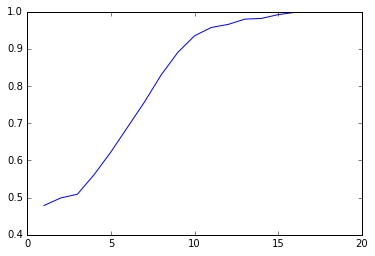

In [48]:
plt.plot(range(1,20),scorelist)

In [87]:
def classifier_metrics_balanced(clf, title):
    #clf = model()
    clf.fit(X_train, y_train)
    print '%30s: %s' % ('Default score (accuracy)', clf.score(X_train, y_train))
    predicted_labels = clf.predict(X_train)
    print '%30s: %s' % ('Cross val score', cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())
    print '%30s: %s' % ('Precision', precision_score(y_train, predicted_labels, average=None))
    print '%30s: %s' % ('Recall', recall_score(y_train, predicted_labels, average=None))

In [182]:
logistic = LogisticRegression(C=1, multi_class='ovr', solver='lbfgs', class_weight='balanced')
treeclf = DecisionTreeClassifier(class_weight='balanced')
forest = RandomForestClassifier(class_weight='balanced')
svc = SVC(class_weight='balanced')
knn = KNeighborsClassifier()

In [183]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'Data includes missing values - not imputed - classes rebalanced'
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_balanced(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
      Default score (accuracy): 0.53752535497
               Cross val score: 0.477236486404
                     Precision: [ 0.78534031  0.47272727  0.28571429  0.38983051  0.32142857]
                        Recall: [ 0.73529412  0.45614035  0.28205128  0.32394366  0.69230769]


Metrics for DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
      Default score (accuracy): 1.0
               Cross val score: 0.397473548375
                     Precision: [ 1.  1.  1.  1.  1.]

In [90]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 2 above - ohe coding, continuous data imputed

In [91]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'OHE coding - continous data imputed - classes rebalanced'
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_balanced(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)
      Default score (accuracy): 0.484787018256
               Cross val score: 0.417161116622
                     Precision: [ 0.76300578  0.41121495  0.3015873   0.35365854  0.22058824]
                        Recall: [ 0.64705882  0.38596491  0.24358974  0.4084507   0.57692308]


Metrics for DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
      Default score (accuracy): 1.0
               Cross val score: 0.393411241634
                     Precision: [ 

In [92]:
X = features_label
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 3 above - label coding, continuous data imputed

In [94]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'Label coding - continuous data imputed - classes rebalanced'
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_balanced(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)
      Default score (accuracy): 0.440162271805
               Cross val score: 0.424010538809
                     Precision: [ 0.69461078  0.39393939  0.20547945  0.33684211  0.25423729]
                        Recall: [ 0.56862745  0.34210526  0.19230769  0.45070423  0.57692308]


Metrics for DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
      Default score (accuracy): 1.0
               Cross val score: 0.403274804521
                     Precision: [ 

In [96]:
X = features_norm
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 4 above - normalized continous data, imputed discrete data

In [99]:
for clf in [logistic, treeclf, forest, svc, knn]:
    title = 'Normalized data - classes rebalanced'
    print 'Metrics for %s' % clf
    print '=' * 50
    classifier_metrics_balanced(clf, title)
    print '\n'

Metrics for LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)
      Default score (accuracy): 0.529411764706
               Cross val score: 0.454720510316
                     Precision: [ 0.79459459  0.48421053  0.29310345  0.37804878  0.2739726 ]
                        Recall: [ 0.72058824  0.40350877  0.21794872  0.43661972  0.76923077]


Metrics for DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
      Default score (accuracy): 1.0
               Cross val score: 0.40946289782
                     Precision: [ 1

#### Moving forward with OHE labeled data

###### ROC curves

In [109]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from scipy import interp
from itertools import cycle

In [125]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 2 above - ohe coding, continuous data imputed

In [245]:
def plot_roc(yscore, normalize=False):
    lw = 2
    # Binarize the output
    eval_size = 0.10
    kf = StratifiedKFold(target, round(1./eval_size))
    train_indices, valid_indices = next(iter(kf))
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    
    y1 = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
    n_classes = y1.shape[1]
    
    

    #X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=1)
    #y_score = OneVsRestClassifier(logistic).fit(X_train, y_train).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
    plt.figure(figsize=(6,4))

    colors = cycle(['r', 'g', 'aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right", prop={'size':8})


In [241]:
tree_model = treeclf.fit(X_train, y_train)
forest_model = forest.fit(X_train, y_train)
lr_model = logistic.fit(X_train, y_train)
knn_model = knn.fit(X_train,y_train)
svc_model = svc.fit(X_train,y_train)

In [246]:


y_score = OneVsRestClassifier(treeclf).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - decision tree')
targettree_predicted_proba = tree_model.predict_proba(X_train)
plt.show()
print "The AUC scores for each class are: %s " % (
    roc_auc_score(y_train,targettree_predicted_proba, average=None))

y_score = OneVsRestClassifier(forest).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - random forest') #not sure why these look so funny!
targetforest_predicted_proba = forest_model.predict_proba(X_train)
plt.show()
print "The AUC scores for each class are: %s " % (
    roc_auc_score(y_train,targetforest_predicted_proba, average=None))

y_score = OneVsRestClassifier(logistic).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - logistic')
targetlr_predicted_proba = lr_model.predict_proba(X_train)
plt.show()
print "The AUC scores for each class are: %s " % (
    roc_auc_score(y_train,targetlr_predicted_proba, average=None))

y_score = OneVsRestClassifier(knn).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - logistic')
targetknn_predicted_proba = knn_model.predict_proba(X_train)
plt.show()
print "The AUC scores for each class are: %s " % (
    roc_auc_score(y_train,targetknn_predicted_proba, average=None))

ValueError: Can only tuple-index with a MultiIndex

In [ ]:
def plot_roc(yscore, normalize=False):
    lw = 2
    # Binarize the output
    y1 = label_binarize(target, classes=[0, 1, 2, 3, 4])
    n_classes = y1.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=1)
    #y_score = OneVsRestClassifier(logistic).fit(X_train, y_train).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
    plt.figure(figsize=(6,4))

    colors = cycle(['r', 'g', 'aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right", prop={'size':8})


###### Confusion matrix

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#This is using option 2 above - ohe coding, continuous data imputed

In [139]:
conf_lr = confusion_matrix(y_train, lr_model.predict(X_train)) 
conf_tree = confusion_matrix(y_train, tree_model.predict(X_train))
conf_forest = confusion_matrix(y_train, forest_model.predict(X_train))
conf_svc = confusion_matrix(y_train, svc_model.predict(X_train))
conf_knn = confusion_matrix(y_train, knn_model.predict(X_train))

In [137]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

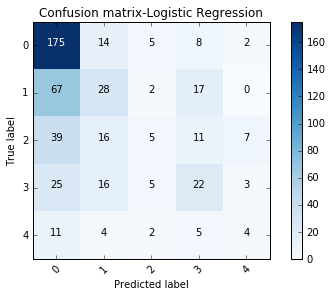

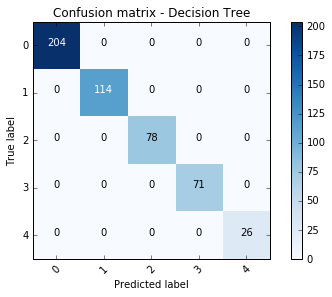

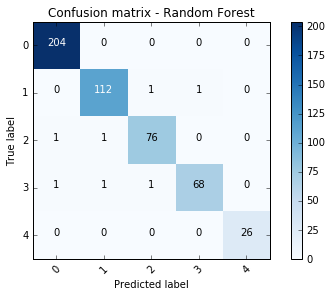

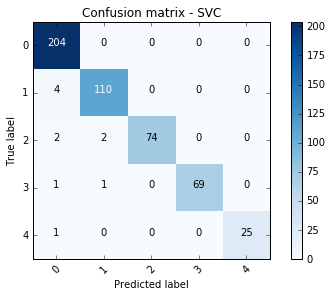

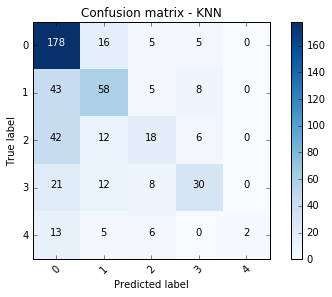

In [140]:
plot_confusion_matrix(conf_lr, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix-Logistic Regression')
plt.show()

plot_confusion_matrix(conf_tree, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - Decision Tree')
plt.show()

plot_confusion_matrix(conf_forest, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - Random Forest')
plt.show()

plot_confusion_matrix(conf_svc, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - SVC')
plt.show()

plot_confusion_matrix(conf_knn, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - KNN')
plt.show()

## Choose model. Hyperparameter optimizaton

#### Moving forward with OHE labeled data and RF model

In [ ]:
## Tuning selected model

In [150]:
X = features_ohe
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
PARAMETERS = {'max_features':['auto','sqrt',0.2], 'max_leaf_nodes':[None,5,6,7,8,9,10,50], 
              'min_samples_leaf':[1,2,4,50], 'criterion':['gini','entropy']}
SCORING = 'accuracy'

from sklearn import grid_search

#Grid Search
model = RandomForestClassifier(class_weight='balanced')
clf = grid_search.GridSearchCV(model, PARAMETERS, scoring=SCORING, verbose=True)
clf.fit(X_train, y_train)

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.4s


 RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.2,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.498985801217


[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:   19.4s finished


## Task7: Test the selected model

In [147]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.2,
            max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
h = rf_model.fit(X_train, y_train)

In [160]:
h.score(X_train, y_train)

0.56389452332657197

In [166]:
rf = RandomForestClassifier(class_weight='balanced')

In [167]:
p = rf.fit(X_train, y_train)

In [168]:
p.score(X_train,y_train)

0.97768762677484788

In [170]:
cross_val_score(p, X_train, y_train, cv=5, scoring='accuracy').mean()

0.46678361713722394

In [193]:
from sklearn.cross_validation import StratifiedKFold

In [199]:
X = features

In [194]:
y = target

In [201]:
eval_size = 0.20
kf = StratifiedKFold(y, round(1./eval_size))
train_indices, valid_indices = next(iter(kf))
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]